In [183]:
# Import the useful libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor as DR
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler as SS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt  # To calculate RMSE
from sklearn.model_selection import RandomizedSearchCV

In [184]:
# Import the dataset
data = pd.read_csv("C:/Users/user/Desktop/Concrete.csv")

In [185]:
# Shape of the dataset?
data.shape

(1030, 9)

In [186]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [187]:
data.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [188]:
# Data description
data.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [189]:
# Data Columns
data.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [190]:
# Null data
data.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [191]:
# Duplicates in the dataset
data.duplicated().sum()

25

In [192]:
duplicates = data[data.duplicated(keep=False)]

# Display the rows with duplicate values
print(duplicates.head(3))

    CementComponent   BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
72             425.0             106.3              0.0           153.5   
77             425.0             106.3              0.0           153.5   
80             425.0             106.3              0.0           153.5   

    SuperplasticizerComponent  CoarseAggregateComponent  \
72                       16.5                     852.1   
77                       16.5                     852.1   
80                       16.5                     852.1   

    FineAggregateComponent  AgeInDays  Strength  
72                   887.1          3      33.4  
77                   887.1          3      33.4  
80                   887.1          3      33.4  


In [193]:
data.shape

(1030, 9)

In [194]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [195]:
data.shape

(1005, 9)

In [196]:
corr_matrix = data.corr()
corr_matrix

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
BlastFurnaceSlag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
FlyAshComponent,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
WaterComponent,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
SuperplasticizerComponent,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
CoarseAggregateComponent,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
FineAggregateComponent,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
AgeInDays,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
Strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


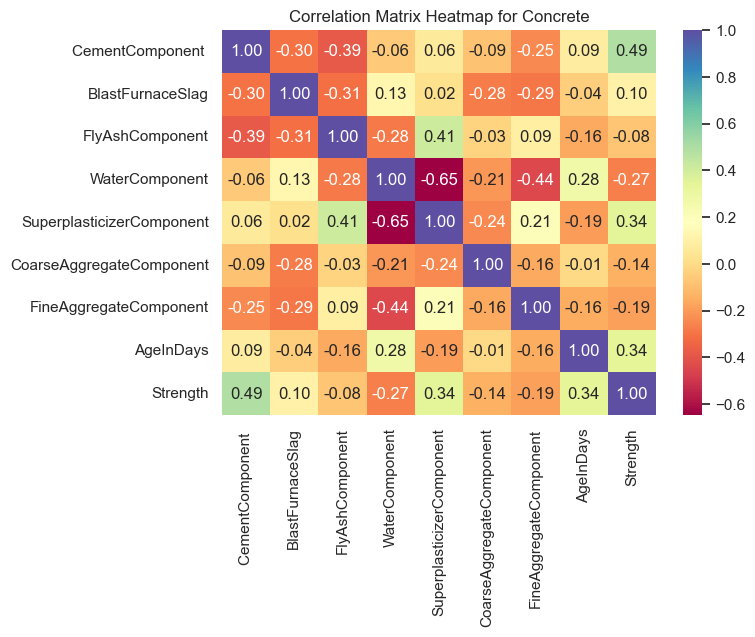

In [197]:
plt.figure(figsize=(7, 5))

# Create a heatmap
sns.heatmap(data.corr(), annot=True, cmap='Spectral', fmt=".2f")

# Set plot title
plt.title("Correlation Matrix Heatmap for Concrete")
plt.show()


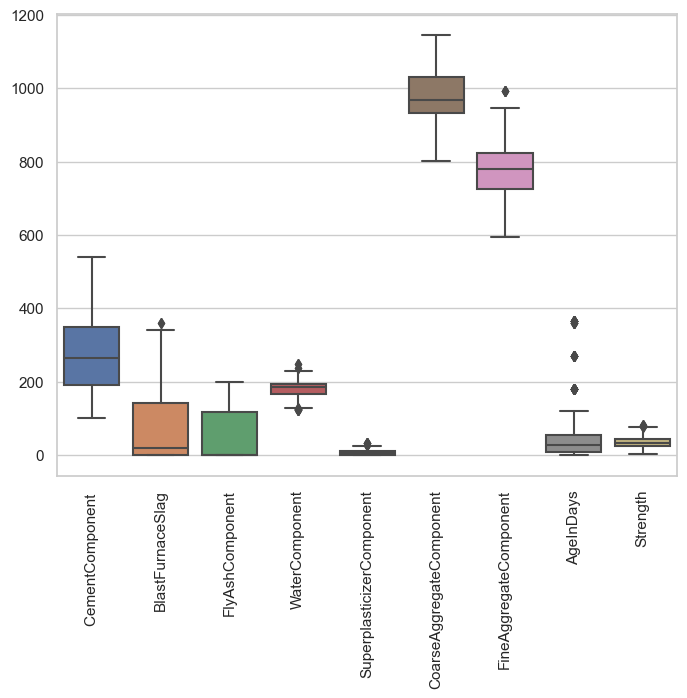

In [198]:
# Boxplot to visualize the outliers
plt.subplots(figsize=(8, 6))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

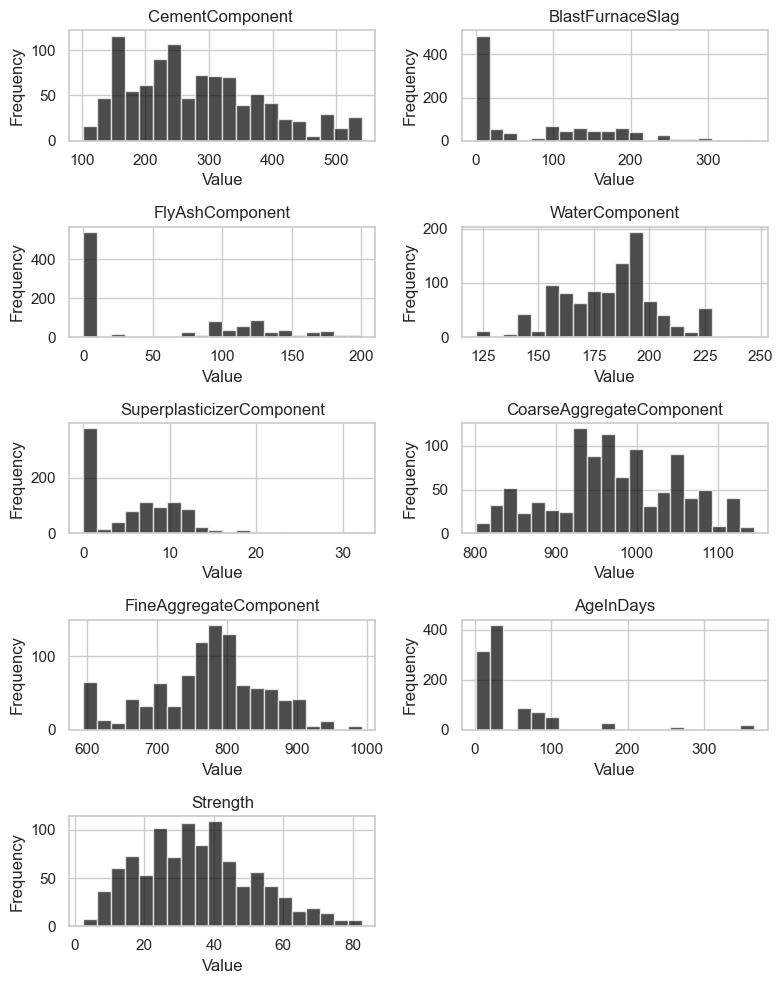

In [199]:
# Histograms of each column

# Get the number of columns
num_cols = data.shape[1]

# Calculate the number of rows and columns for the subplots
num_rows = (num_cols + 1) // 2 
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through the columns and create histograms
for i, col in enumerate(data.columns):
    ax = axes[i]
    ax.hist(data[col], bins=20, alpha=0.7, color='black', edgecolor='white')
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any remaining empty subplots
for i in range(len(data.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust the spacing between subplots
plt.tight_layout()
# Show the plots
plt.show()


In [200]:
# Select the features using paarmeters with correlation > 0.15
features = ['CementComponent ','WaterComponent','SuperplasticizerComponent',
            'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']

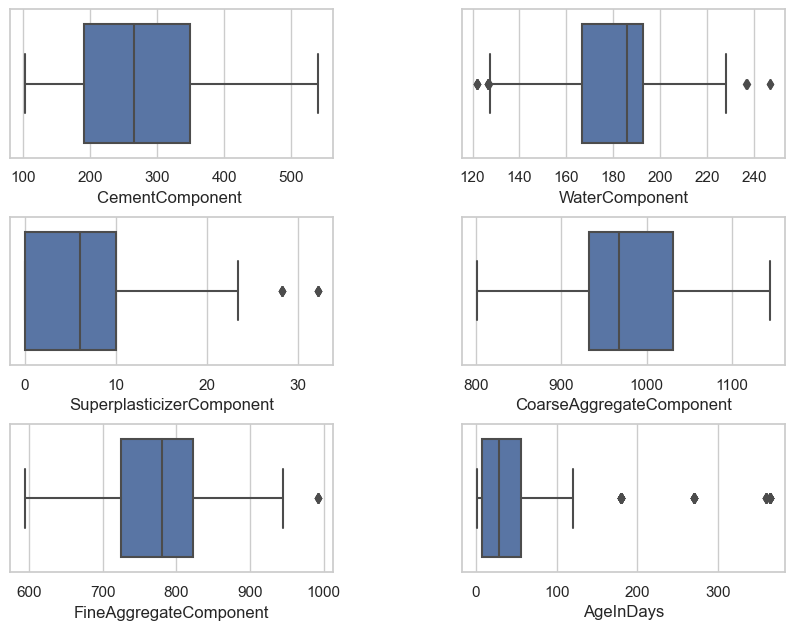

In [201]:
plt.figure(figsize =(10,10))
n = 0
sns.set(style="whitegrid")
for i in features:
    n += 1
    plt.subplot(4,2,n)
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
    sns.boxplot(x = data[i])
plt.show()

In [202]:
# Select the features
X = data[features]

In [203]:
# Target variable
y = data[['Strength']]

In [204]:
# Data Splitting: Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [205]:
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (804, 6)
X_test_shape: (201, 6)
y_train_shape: (804, 1)
y_test_shape: (201, 1)


In [206]:
# Create a StandardScaler to scale the features
scaler = SS()

In [207]:
# Fit and transform the training data with StandardScaler
X_train_scaled = scaler.fit_transform(X_train)

In [208]:
# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [209]:
# Create a Decision Tree Regression
regressor = DR()

In [210]:
# Hyperparameter tuning using Random Search
param_dist = {
    'max_depth': [40],  
    'min_samples_split': [2],     
    'min_samples_leaf': [1]    
}
random_search = RandomizedSearchCV(regressor, param_dist, n_iter=10, scoring='neg_mean_absolute_error', cv=5)
random_search.fit(X_train_scaled, y_train)
best_params_random = random_search.best_params_

D:\Users\Apps\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [211]:
# Train the best model with the tuned hyperparameters
best_regressor_random = DR(**best_params_random)

In [212]:
# Perform cross-validation for the best model
cv_scores_random = cross_val_score(best_regressor_random, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')

In [213]:
# Make predictions on the testing data for the best model
best_regressor_random.fit(X_train_scaled, y_train)
y_pred_random = best_regressor_random.predict(X_test_scaled)

In [214]:
# Calculate metrics for training data
y_train_pred = best_regressor_random.predict(X_train_scaled)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))

In [215]:
# Calculate metrics for testing data
r2_test = r2_score(y_test, y_pred_random)
mae_test = mean_absolute_error(y_test, y_pred_random)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_random))

In [221]:
# Display metrics
print(f"Best Parameters: {best_params_random}")
print("Training R-squared: {:.2f}".format(r2_train))
print("Training MAE: {:.2f}".format(mae_train))
print("Training RMSE: {:.2f}".format(rmse_train))
print("Testing R-squared: {:.2f}".format(r2_test))
print("Testing MAE: {:.2f}".format(mae_test))
print("Testing RMSE: {:.2f}".format(rmse_test))
print("Cross-Validation MAE: {:.2f}".format(-cv_scores_random.mean()))


Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40}
Training R-squared: 1.00
Training MAE: 0.13
Training RMSE: 1.05
Testing R-squared: 0.84
Testing MAE: 4.32
Testing RMSE: 6.93
Cross-Validation MAE: 5.56


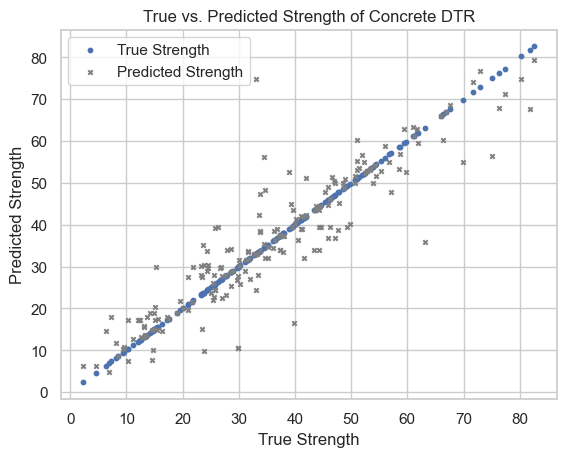

In [217]:
# Create a figure and axis
fig, ax = plt.subplots()

# Convert y_test and y_pred_random to one-dimensional arrays
y_test = np.ravel(y_test)
y_pred_random = np.ravel(y_pred_random)

# Set marker styles and colors for true and predicted values
ax.scatter(y_test, y_test, c='b', marker='o', label='True Strength', s=10) 
ax.scatter(y_test, y_pred_random, c='grey', marker='x', label='Predicted Strength', s=10)

# Add labels and a legend
ax.set_xlabel("True Strength")
ax.set_ylabel("Predicted Strength")
ax.set_title("True vs. Predicted Strength of Concrete DTR")
ax.legend()

# Show the plot
plt.show()


In [218]:
# Convert y_test and y_pred_random to one-dimensional arrays
y_test = np.ravel(y_test)
y_pred_random = np.ravel(y_pred_random)

# Round the predicted values to 2 decimal places
y_pred_random_rounded = np.around(y_pred_random, decimals=2)
# Create a Pandas DataFrame
true_vs_pred_df = pd.DataFrame({'True Strength': y_test, 'Predicted Strength DTR': y_pred_random_rounded})
true_vs_pred_df.head(10)

,True Strength,Predicted Strength DTR
0,19.01,19.01
1,24.29,28.94
2,26.32,39.36
3,34.57,56.10
4,44.13,44.09
5,33.00,24.48
6,17.28,17.96
7,25.42,21.92
8,33.73,38.60
9,34.40,35.30
